# Time Series Forecasting with the Long Short-Term Memory Network in Python

Tutorial from https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/

/var/folders/xz/xnfjgfvn0yg69wvj2svb7crr0000gn/T/ipykernel_13741/1617954986.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


/var/folders/xz/xnfjgfvn0yg69wvj2svb7crr0000gn/T/ipykernel_13741/1617954986.py:18: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


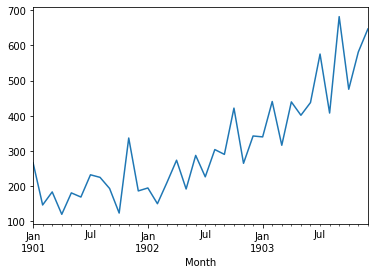

In [18]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy

# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# summarize first few rows
print(series.head())
# line plot
series.plot()
pyplot.show()

In [19]:
# split data into train and test
X = series.values
train, test = X[0:-12], X[-12:]

RMSE: 136.761


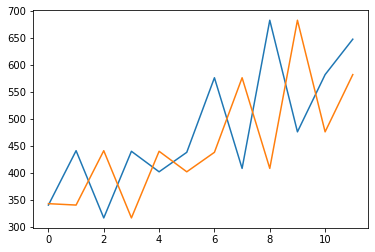

[339.7 440.4 315.9 439.3 401.3 437.4 575.5 407.6 682.  475.3 581.3 646.9]
[342.3, 339.7, 440.4, 315.9, 439.3, 401.3, 437.4, 575.5, 407.6, 682.0, 475.3, 581.3]


In [20]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# make prediction
	predictions.append(history[-1])
	# observation
	history.append(test[i])
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(test)
pyplot.plot(predictions)
pyplot.show()
print(test)
print(predictions)

In [22]:
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
 
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df

# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled

# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]
 
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

# transform to be stationary
differenced = difference(series, 1)

# transform to supervised learning
X = differenced.values
supervised = timeseries_to_supervised(X, 1)
print(supervised.head())

# transform scale
X = supervised.values[:,0]
X = X.reshape(len(X), 1)
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(X)
scaled_X = scaler.transform(X)
scaled_series = Series(scaled_X[:, 0])
print(scaled_series.head())

       0      0
0    0.0 -120.1
1 -120.1   37.2
2   37.2  -63.8
3  -63.8   61.0
4   61.0  -11.8
0   -0.140719
1   -0.639992
2    0.013926
3   -0.405945
4    0.112866
dtype: float64


/var/folders/xz/xnfjgfvn0yg69wvj2svb7crr0000gn/T/ipykernel_13741/3964441790.py:47: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


/var/folders/xz/xnfjgfvn0yg69wvj2svb7crr0000gn/T/ipykernel_13741/493304695.py:21: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


1) Test RMSE: 104.320
2) Test RMSE: 104.432
3) Test RMSE: 106.602
4) Test RMSE: 206.815
5) Test RMSE: 138.085
6) Test RMSE: 150.352
7) Test RMSE: 183.307
8) Test RMSE: 365.866
9) Test RMSE: 148.049
10) Test RMSE: 116.333
11) Test RMSE: 94.758
12) Test RMSE: 190.196
13) Test RMSE: 177.956
14) Test RMSE: 108.290
15) Test RMSE: 97.172
16) Test RMSE: 116.369
17) Test RMSE: 164.453
18) Test RMSE: 133.671
19) Test RMSE: 282.316
20) Test RMSE: 113.896
21) Test RMSE: 96.431
22) Test RMSE: 99.972
23) Test RMSE: 332.184
24) Test RMSE: 130.989
25) Test RMSE: 164.100
26) Test RMSE: 181.752
27) Test RMSE: 116.003
28) Test RMSE: 117.175
29) Test RMSE: 144.469
30) Test RMSE: 120.010
             rmse
count   30.000000
mean   153.544166
std     67.358186
min     94.758077
25%    109.691386
50%    132.329997
75%    174.580236
max    365.865950


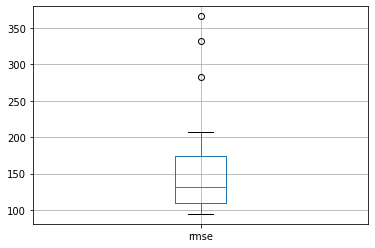

In [29]:
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True)) # Q3: why stateful=True? I thought that's default behaviour?
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')

	# Q2: why reset_states ???
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
		model.reset_states() # why?
	return model

# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]

# load dataset
series = read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

# transform data to be stationary
raw_values = series.values
diff_values = difference(raw_values, 1) # Q1: why?

# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values

# split data into train and test-sets
train, test = supervised_values[0:-12], supervised_values[-12:]

# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# repeat experiment
repeats = 30
error_scores = list()
for r in range(repeats):
	# fit the model
	lstm_model = fit_lstm(train_scaled, 1, 3000, 4)
	# forecast the entire training dataset to build up state for forecasting
	train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
	lstm_model.predict(train_reshaped, batch_size=1)
	# walk-forward validation on the test data
	predictions = list()
	for i in range(len(test_scaled)):
		# make one-step forecast
		X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
		yhat = forecast_lstm(lstm_model, 1, X)
		# invert scaling
		yhat = invert_scale(scaler, X, yhat)
		# invert differencing
		yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
		# store forecast
		predictions.append(yhat)
	# report performance
	rmse = sqrt(mean_squared_error(raw_values[-12:], predictions))
	print('%d) Test RMSE: %.3f' % (r+1, rmse))
	error_scores.append(rmse)
 
# summarize results
results = DataFrame()
results['rmse'] = error_scores
print(results.describe())
results.boxplot()
pyplot.show()

## Questions

1. Is it true that we need to differentiate the timeseries if there is a trend?
2. Why do we reset LSTM states while training???
3. Why do we have to say 'stateful=True' when creating LSTM? I thought all LSTM have long term state??
4. What are epochs, neurons and batch size? How does LSTM get trained?? answered